In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import re
import pickle
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [41]:
#mean_radius=float(input("Enter Mean Radius: "))
#mean_texture=float(input("Enter Mean Texture: "))
#mean_perimeter=float(input("Enter Mean Perimeter: "))
#mean_area=float(input("Enter Mean Area: "))
#mean_smoothness=float(input("Enter Mean Smoothness: "))
#mean_compactness=float(input("Enter Mean Compactness: "))
#mean_concavity=float(input("Enter Mean Concavity: "))
#mean_concave_points=float(input("Enter Mean Concave Points: "))
#mean_symmetry=float(input("Enter Mean Symmetry: "))
#mean_fractal_dimension=float(input("Enter Mean Fractal Dimension: "))
#radius_error=float(input("Enter Radius Error: "))
#texture_error=float(input("Enter Texture Error: "))
#perimeter_error=float(input("Enter Perimeter Error: "))
#area_error=float(input("Enter Area Error: "))
#smoothness_error=float(input("Enter Smoothness Error: "))
#compactness_error=float(input("Enter Compactness Error: "))
#concativity_error=float(input("Enter Concavity Error: "))
#concave_points_error=float(input("Enter Concave Points Error: "))
#symmetry_error=float(input("Enter Symmetry Error: "))
#fractal_dimension_error=float(input("Enter Fractal Dimension Error: "))
#worst_radius=float(input("Enter Worst Radius: "))
#worst_texture=float(input("Enter Worst Texture: "))
#worst_perimeter=float(input("Enter Worst Perimeter: "))
#worst_area=float(input("Enter Worst Area: "))
#worst_smoothness=float(input("Enter Worst Smoothness: "))
#worst_compactness=float(input("Enter Worst Compactness: "))
#worst_concavity=float(input("Enter Worst Concavity: "))
#worst_concave_points=float(input("Enter Worst Concave Points: "))
#worst_symmetry=float(input("Enter Worst Symmetry: "))
#worst_fractal_dimension=float(input("Enter Worst Fractal Dimension: "))


In [42]:
parkinsons=pd.read_csv('parkinsons.data',sep=",")

In [43]:
parkinsons.shape

(195, 24)

In [44]:
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [45]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [46]:
parkinsons.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [47]:
parkinsons.drop('name',axis=1,inplace=True)

In [48]:
parkinsons[parkinsons['status'] == 0].head()



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [49]:
parkinsons.head(10)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [50]:
# g=sns.pairplot(parkinsons,hue='status',palette='coolwarm', height=10,aspect=0.6)
# g.fig.set_size_inches(25,25)

In [51]:
scaler=StandardScaler()

In [52]:
scaler.fit(parkinsons.drop('status',axis=1))

StandardScaler()

In [53]:
scaled_features=scaler.transform(parkinsons.drop('status',axis=1))

In [54]:
parkinsons.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [55]:
columns=['MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitterpercent',
       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmer',
       'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA',
       'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE']
scaled_feat=pd.DataFrame(scaled_features,columns=columns)
scaled_feat

,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitterpercent,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,MDVPShimmerdB,...,MDVPAPQ,ShimmerDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


In [56]:
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in parkinsons.columns}
new_n_list = list(new_names.values())
# [LightGBM] Feature appears more than one time.
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col 
             for i, (col, new_col) in enumerate(new_names.items())}
parkinsons = parkinsons.rename(columns=new_names)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(parkinsons.drop('status',axis=1), parkinsons['status'], test_size=0.33, random_state=55)

In [58]:
model1 = svm.SVC()
model1.fit(X_train, y_train)


SVC()

In [59]:
y_pred1 = model1.predict(X_test)
print(f"SVM Model accuracy : {round(acc(y_test, y_pred1) * 100, 2)}%")

SVM Model accuracy : 83.08%


In [60]:
model2=LogisticRegression()
model2.fit(X_train,y_train)


c:\Users\Mahdi-e\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred2 = model2.predict(X_test)
test_data_accuracy = acc(y_test, y_pred2)

In [62]:

print(f"LogisticRegressionModel accuracy : {round(acc(y_test, y_pred2) * 100, 2)}%")

LogisticRegressionModel accuracy : 86.15%


In [63]:
model3 = LGBMClassifier()
model3.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 97, number of negative: 33
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 130, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.746154 -> initscore=1.078203
[LightGBM] [Info] Start training from score 1.078203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier()

In [64]:
y_pred3 = model3.predict(X_test)
print(y_pred3)
# accuracy = model3.score(X_test, y_test)
# print(accuracy)

[1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0]


In [65]:
print(f"LGBMClassifier Model accuracy : {round(acc(y_test, y_pred3) * 100, 2)}%")

LGBMClassifier Model accuracy : 87.69%


In [66]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
y_pred4 = model4.predict(X_test)
print(f"RandomForestClassifier Model accuracy : {round(acc(y_test, y_pred4) * 100, 2)}%")

RandomForestClassifier Model accuracy : 89.23%


In [68]:
model5 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model5.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

In [69]:
y_pred5 = model5.predict(X_test)
print(y_pred5)
accuracy_1 = model5.score(X_test, y_test)
# ac=acc(y_test, y_pred5)
# print(ac)
print(f"ExtraTreesClassifier Model accuracy: {round(accuracy_1 * 100, 2)}%")
# print(f"ExtraTreesClassifier Model accuracy : {round(acc(y_test, y_pred5) * 100, 2)}%")==error

[1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0]
ExtraTreesClassifier Model accuracy: 92.31%


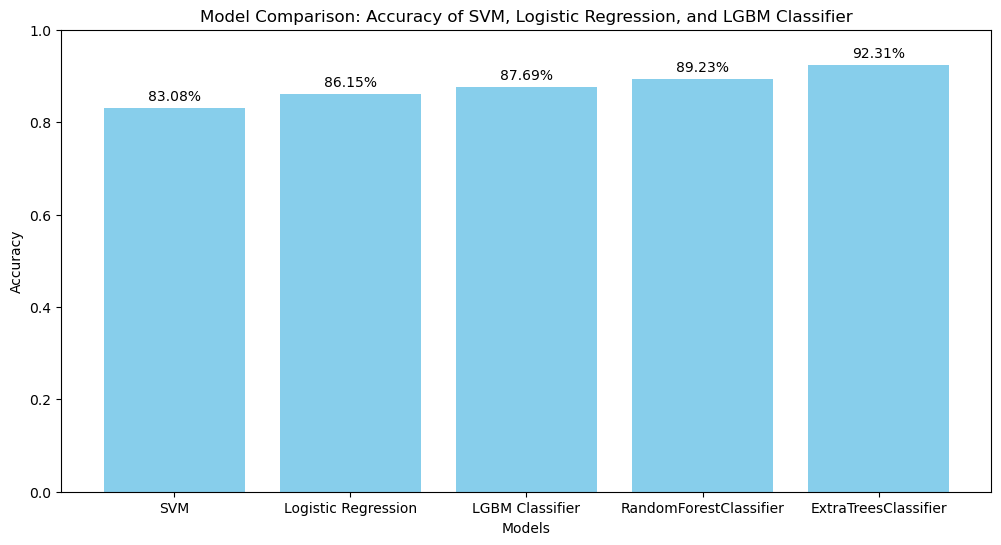

In [70]:
import matplotlib.pyplot as plt

models = ['SVM', 'Logistic Regression', 'LGBM Classifier','RandomForestClassifier','ExtraTreesClassifier']
accuracies = [acc(y_test, y_pred1), acc(y_test, y_pred2), acc(y_test, y_pred3),acc(y_test , y_pred4),acc(y_test,y_pred5)]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of SVM, Logistic Regression, and LGBM Classifier')
plt.ylim(0, 1)


for index, acc in enumerate(accuracies):
    plt.text(index, acc + 0.01, f"{round(acc * 100, 2)}%", ha='center', va='bottom')

plt.show()

In [71]:
f1 = f1_score(y_test, y_pred5)
print("F1 Score: ", f1)

F1 Score:  0.9504950495049505


In [72]:

roc_auc = roc_auc_score(y_test, model5.predict_proba(X_test)[:, 1])

print("ROC-AUC: ", roc_auc)

ROC-AUC:  0.9706666666666667


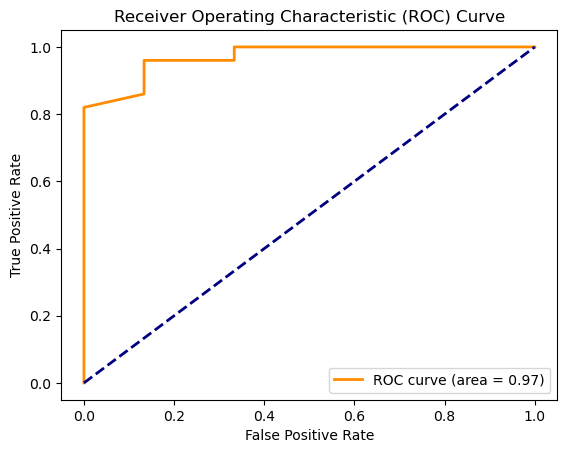

In [73]:

y_score = model5.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
cm = confusion_matrix(y_test, y_pred5)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 48
False Positive (FP): 3
False Negative (FN): 2


In [75]:
def calculate_metrics(TP, FP, FN):
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    
    if recall + precision == 0:
        f_measure = 0
    else:
        f_measure = 2 * (precision * recall) / (precision + recall)
    
    return recall, precision, f_measure

recall, precision, f_measure = calculate_metrics(TP, FP, FN)

print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F-measure: {:.2f}".format(f_measure))

Recall: 0.96
Precision: 0.94
F-measure: 0.95


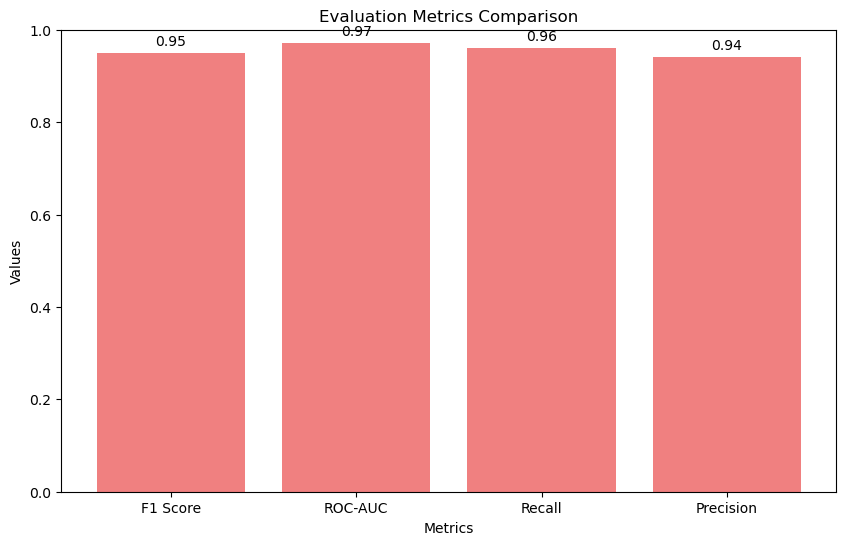

In [76]:
import matplotlib.pyplot as plt

metrics = ['F1 Score', 'ROC-AUC', 'Recall', 'Precision', ]
values = [f1, roc_auc, recall, precision]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='lightcoral')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics Comparison')
plt.ylim(0, 1)

for index, value in enumerate(values):
    plt.text(index, value + 0.01, "{:.2f}".format(value), ha='center', va='bottom')

plt.show()

In [77]:
y_test

79     1
116    1
134    1
172    0
123    1
      ..
187    0
63     0
12     1
92     1
46     0
Name: status, Length: 65, dtype: int64

In [78]:
mdvp_fo_hz=float(input("Enter Average Vocal Fundamental Frequency: "))
mdvp_fhi_hz=float(input("Enter Maximum Vocal Fundamental Frequency: "))
mdvp_flo_hz=float(input("Enter Minimum Vocal Fundamental Frequency: "))
mdvp_jitter_percent=float(input("Enter Variation In Fundamental Frequency(%): "))
mdvp_jitter_abs=float(input("Enter Variation In Fundamental Frequency(abs): "))
mdvp_rap=float(input("Enter Variation In Fundamental Frequency(RAP): "))
mdvp_jitter_ppq=float(input("Enter Variation In Fundamental Frequency(PPQ): "))
jitter_ddp=float(input("Enter Variation In Fundamental Frequency(DDP): "))
mdvp_shimmer=float(input("Enter Variation In Amplitude: "))
mdvp_shimmer_db=float(input("Enter Variation In Amplitude(dB): "))
shimmer_apq3=float(input("Enter Variation In Amplitude(APQ3): "))
mdvp_shimmer_apq5=float(input("Enter Variation In Amplitude(APQ5): "))
mdvp_apq=float(input("Enter Variation In Amplitude(APQ): "))
shimmer_dda=float(input("Enter Variation In Amplitude(DDA): "))
nhr=float(input("Enter Measure Of Ratio Of Noise To Tonal component In The Voice(NHR): "))
hnr=float(input("Enter Measure Of Ratio Of Noise To Tonal component In The Voice(HNR): "))
rpde=float(input("Enter Nonlinear Dynamical Complexity Measure(RPDE): "))
d2=float(input("Enter Nonlinear Dynamical Complexity Measure(D2): "))
dfa=float(input("Enter Signal Fractal Scaling Exponent: "))
spread1=float(input("Enter Nonlinear Measure Of Fundamental Frequency Variation(Spread1): "))
spread2=float(input("Enter Nonlinear Measure Of Fundamental Frequency Variation(Spread2): "))
ppe=float(input("Enter Nonlinear Measure Of Fundamental Frequency Variation(PPE): "))


In [79]:
# 119.99200
# Enter Maximum Vocal Fundamental Frequency: 157.30200
# Enter Minimum Vocal Fundamental Frequency: 74.99700
# Enter Variation In Fundamental Frequency(%): 0.00784
# Enter Variation In Fundamental Frequency(abs): 0.00007
# Enter Variation In Fundamental Frequency(RAP): 0.00370
# Enter Variation In Fundamental Frequency(PPQ): 0.00554
# Enter Variation In Fundamental Frequency(DDP): 0.01109
# Enter Variation In Amplitude: 0.04374
# Enter Variation In Amplitude(dB): 0.42600
# Enter Variation In Amplitude(APQ3): 0.02182
# Enter Variation In Amplitude(APQ5): 0.03130
# Enter Variation In Amplitude(APQ): 0.02971
# Enter Variation In Amplitude(DDA): 0.06545
# Enter Measure Of Ratio Of Noise To Tonal component In The Voice(NHR): 0.02211
# Enter Measure Of Ratio Of Noise To Tonal component In The Voice(HNR): 21.03300
# Enter Nonlinear Dynamical Complexity Measure(RPDE): 0.414783
# Enter Nonlinear Dynamical Complexity Measure(D2): 0.815285
# Enter Signal Fractal Scaling Exponent: -4.813031
# Enter Nonlinear Measure Of Fundamental Frequency Variation(Spread1): 0.266482
# Enter Nonlinear Measure Of Fundamental Frequency Variation(Spread2): 2.301442
# Enter Nonlinear Measure Of Fundamental Frequency Variation(PPE): 0.284654

In [80]:
prop=[]
prop.extend([mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_percent,mdvp_jitter_abs,mdvp_rap,mdvp_jitter_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,mdvp_shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,rpde,d2,dfa,spread1,spread2,ppe])

In [81]:
prop_data=pd.DataFrame(columns=['mdvp_fo_hz','mdvp_fhi_hz','mdvp_flo_hz','mdvp_jitter_percent','mdvp_jitter_abs','mdvp_rap','mdvp_jitter_ppq','jitter_ddp','mdvp_shimmer','mdvp_shimmer_db','shimmer_apq3','mdvp_shimmer_apq5','mdvp_apq','shimmer_dda','nhr','hnr','rpde','d2','dfa','spread1','spread2','ppe'])

In [82]:
prop_data.loc[len(prop)] = prop

In [83]:
prop_array = np.array(prop).reshape(1, -1)

In [84]:
pred = model5.predict(prop_array)

if pred == 1:
    print("RISK")
else:
    print("NO RISK")

RISK


c:\Users\Mahdi-e\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [85]:
pickle.dump(model3, open('model.parkinsons', 'wb'))